In [ ]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IOT-temp.csv to IOT-temp.csv


In [ ]:
import io
iot_temp_df = pd.read_csv(io.BytesIO(uploaded['IOT-temp.csv']))

In [ ]:
iot_temp_df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_126924_cb744837,Room Admin,01-11-2018 00:06,32,In
1,__export__.temp_log_146101_e61c18d4,Room Admin,01-11-2018 00:07,40,Out
2,__export__.temp_log_111262_7b3ed086,Room Admin,01-11-2018 00:09,39,Out
3,__export__.temp_log_147650_344507e9,Room Admin,01-11-2018 00:13,40,Out
4,__export__.temp_log_139505_cd77d7f9,Room Admin,01-11-2018 00:23,40,Out


In [ ]:
iot_temp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [ ]:
display(iot_temp_df[["noted_date"]].agg(['min', 'max']).transpose())

,min,max
noted_date,2018-01-11 00:06:00,2018-12-10 23:55:00


In [ ]:
display(iot_temp_df.groupby("out/in")["noted_date"].agg(["min", "max"]))


,min,max
out/in,,
In,2018-01-11 00:06:00,2018-12-10 21:33:00
Out,2018-01-11 00:07:00,2018-12-10 23:55:00


In [ ]:
iot_temp_df = iot_temp_df.sort_values(by=["noted_date"]).reset_index(drop=True)


In [ ]:
def unique_value_count(
    df: pd.DataFrame
):
    df_nunique = df.nunique().reset_index()
    df_nunique['dtype'] = df.dtypes.reset_index().loc[:, 0]
    df_nunique.columns = ['column', 'nunique', 'dtype']

    display(df_nunique)

In [ ]:
unique_value_count(df=iot_temp_df)

,column,nunique,dtype
0,id,97605,object
1,room_id/id,1,object
2,noted_date,27920,datetime64[ns]
3,temp,31,int64
4,out/in,2,object


In [ ]:
# Dropping columns
iot_temp_df = iot_temp_df.drop(
    columns=["id", "room_id/id"],
    errors="ignore"
)

In [ ]:
iot_temp_df.shape

(97606, 3)

In [ ]:
iot_temp_undup_df = iot_temp_df.drop_duplicates()

iot_temp_undup_df.shape

(37268, 3)

In [ ]:

# Finding duplicate rows
display(iot_temp_df[iot_temp_df.duplicated()].head())

,noted_date,temp,out/in
179,01-11-2018 09:59,47,Out
185,01-11-2018 10:13,46,Out
194,01-11-2018 10:26,46,Out
204,01-11-2018 10:39,46,Out
205,01-11-2018 10:39,46,Out


In [ ]:
# Observing one duplicate timestamp
display(iot_temp_df[iot_temp_df.noted_date == "2018-01-11 09:59:00"])

,noted_date,temp,out/in
177,2018-01-11 09:59:00,47,Out
178,2018-01-11 09:59:00,47,Out
179,2018-01-11 09:59:00,46,Out


In [ ]:
iot_temp_df_cleaned = iot_temp_undup_df.groupby(["noted_date", "out/in"])["temp"].agg("mean")
iot_temp_df_cleaned = iot_temp_df_cleaned.reset_index()

display(iot_temp_df_cleaned.head())


,noted_date,out/in,temp
0,01-11-2018 00:06,In,32.0
1,01-11-2018 00:07,Out,40.0
2,01-11-2018 00:09,Out,39.0
3,01-11-2018 00:13,Out,40.0
4,01-11-2018 00:23,Out,40.0


In [ ]:
iot_temp_df_pivoted = iot_temp_df_cleaned.pivot(
    index="noted_date",
    columns="out/in",
    values="temp"
)
iot_temp_df_pivoted.columns.name = None

display(iot_temp_df_pivoted.head())

,In,Out
noted_date,,
01-11-2018 00:06,32.0,NaN
01-11-2018 00:07,NaN,40.0
01-11-2018 00:09,NaN,39.0
01-11-2018 00:13,NaN,40.0
01-11-2018 00:23,NaN,40.0


In [ ]:
iot_temp_df_pivoted.index

Index(['01-11-2018 00:06', '01-11-2018 00:07', '01-11-2018 00:09',
       '01-11-2018 00:13', '01-11-2018 00:23', '01-11-2018 00:25',
       '01-11-2018 00:31', '01-11-2018 00:33', '01-11-2018 00:37',
       '01-11-2018 00:41',
       ...
       '31-10-2018 23:32', '31-10-2018 23:37', '31-10-2018 23:45',
       '31-10-2018 23:47', '31-10-2018 23:50', '31-10-2018 23:52',
       '31-10-2018 23:53', '31-10-2018 23:54', '31-10-2018 23:55',
       '31-10-2018 23:57'],
      dtype='object', name='noted_date', length=27920)

In [ ]:
iot_temp_df_pivoted=iot_temp_df_pivoted.set_index(pd.DatetimeIndex(iot_temp_df_pivoted.index))

In [ ]:
# Hourly resampled
iot_temp_hourly_df = iot_temp_df_pivoted.resample("1H").mean()

# Daily resampled
iot_temp_daily_df = iot_temp_hourly_df.resample("1D").mean()

# Monthly resampled
iot_temp_monthly_df = iot_temp_daily_df.resample("1M").mean()

In [ ]:
display(iot_temp_hourly_df.head())

,In,Out
noted_date,,
2018-01-11 00:00:00,32.000000,40.071429
2018-01-11 01:00:00,NaN,40.333333
2018-01-11 02:00:00,31.750000,38.428571
2018-01-11 03:00:00,30.444444,40.666667
2018-01-11 04:00:00,30.000000,42.200000


In [ ]:
display(iot_temp_daily_df.head())

,In,Out
noted_date,,
2018-01-11,30.803413,43.340254
2018-01-12,NaN,37.676724
2018-01-13,NaN,NaN
2018-01-14,NaN,NaN
2018-01-15,NaN,NaN


In [ ]:
display(iot_temp_monthly_df.head())

,In,Out
noted_date,,
2018-01-31,30.803413,40.508489
2018-02-28,31.246524,37.821089
2018-03-31,31.060884,37.576172
2018-04-30,30.167035,37.285947
2018-05-31,29.632188,35.196738


In [ ]:
def plot_temperature(
    df: pd.DataFrame,
    x_axis: str,
    y_axis: str,
    columns: list,
    plot_title: str
):
    fig = go.Figure()

    for column in columns:
        fig.add_trace(go.Scatter(
            name=column,
            x=df.index,
            y=df[column]
        ))

    fig.update_layout(
        title=f"<b>{plot_title}</b>",
        xaxis_title=x_axis,
        yaxis_title=y_axis
    )

    fig.show()

In [ ]:
plot_temperature(
    df=iot_temp_hourly_df,
    x_axis="noted_date",
    y_axis="temperature (&deg;C)",
    columns=["In", "Out"],
    plot_title="Comparing hourly inside and outside temperature"
)

In [ ]:

plot_temperature(
    df=iot_temp_monthly_df,
    x_axis="noted_date",
    y_axis="temperature (&deg;C)",
    columns=["In", "Out"],
    plot_title="Comparing monthly inside and outside temperature"
)

In [ ]:

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=iot_temp_hourly_df["In"],
        name="In"
    ))

fig.add_trace(
    go.Histogram(
        x=iot_temp_hourly_df["Out"],
        name="Out"
    ))

fig.update_layout(
    xaxis_title="temperature (&deg;C)",
    yaxis_title="count",
    title="<b>Distribution of hourly inside and outside temperature</b>"
)

fig.show()

In [ ]:
# iot_temp_hourly_df['In_greater']='out_greater'
iot_temp_hourly_df.loc[iot_temp_hourly_df.In>iot_temp_hourly_df.Out,'In_greater']='in_greater'


In [ ]:
iot_temp_hourly_df['In_greater'].value_counts()

out_greater    7946
in_greater       70
Name: In_greater, dtype: int64

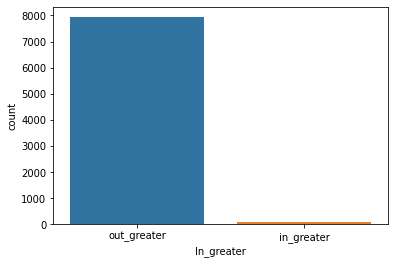

In [ ]:
sns.countplot(x='In_greater',data=iot_temp_hourly_df)

In [ ]:
plot_temperature(
    df=iot_temp_hourly_df.loc[iot_temp_hourly_df.In>iot_temp_hourly_df.Out],
    x_axis="noted_date",
    y_axis="temperature (&deg;C)",
    columns=["In", "Out"],
    plot_title="Comparing monthly inside and outside temperature"
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>